Módulo: Bibliotecas e APIs (Python)<br>
Projeto: dataset Olympics - uso de bibliotecas de visualização <br>
Professor: Rafael Moreira (Analista de sistemas)<br>
Entregue: 08/09/2021<br>

# História das Olimpíadas - Parte 2

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuste dos visuais dos gráficos
sns.set_theme()
sns.set(font_scale = 1.5)

In [2]:
df_atletas = pd.read_csv('athlete_events.csv', encoding = 'utf8')
df_atletas.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [3]:
df_medalhistasBR = df_atletas[(df_atletas['NOC']=='BRA') & (~df_atletas['Medal'].isna())].reset_index(drop=True)
df_medalhistasBR.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

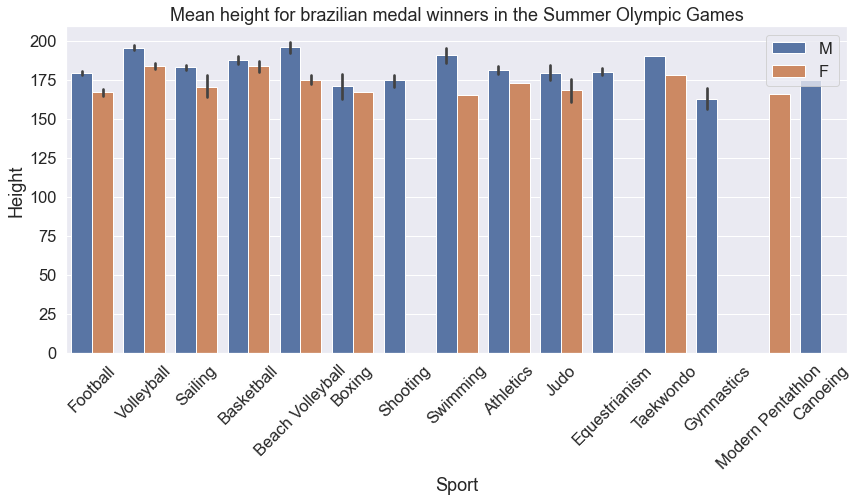

In [4]:
plt.figure(figsize=(14,6))

ax1 = sns.barplot(data=df_medalhistasBR,x='Sport', y='Height', hue='Sex')
plt.legend(loc='upper right')
plt.title('Mean height for brazilian medal winners in the Summer Olympic Games')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45);

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

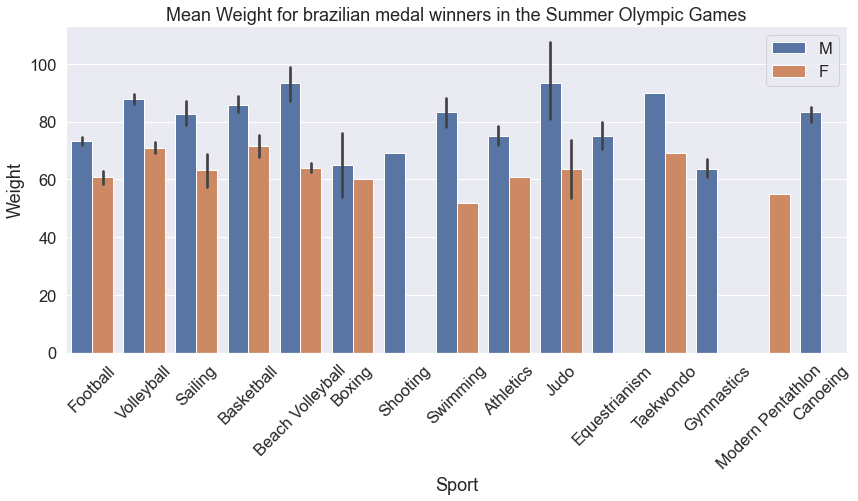

In [5]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=df_medalhistasBR,x='Sport', y='Weight', hue='Sex' )
plt.legend(loc='upper right')
plt.title('Mean Weight for brazilian medal winners in the Summer Olympic Games')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [6]:
# Selecionando o nome dos maiores medalhistas brasileiros:
nome_maiores = df_medalhistasBR['Name'].value_counts()[df_medalhistasBR['Name'].value_counts() >= df_medalhistasBR['Name'].value_counts().max()].index

In [7]:
# Filtrando um DF para os maiores medalhistas
df_maiores_medalhistasBR = pd.DataFrame()
for nome in nome_maiores:
    df_maiores_medalhistasBR = df_maiores_medalhistasBR.append(df_medalhistasBR[df_medalhistasBR['Name'] == nome])
#df_maiores_medalhistasBR

In [8]:
# Gerando series sumarizando nomes e medalhas
series_aux = df_maiores_medalhistasBR.groupby('Name')['Medal'].value_counts()
#series_aux

In [9]:
df_aux = pd.concat([series_aux.loc['Robert Scheidt'].T,series_aux.loc['Torben Schmidt Grael'].T],axis=1)
df_aux.columns=nome_maiores
df_aux=df_aux.T
df_aux['Total'] = df_aux.sum(axis=1)
#df_aux

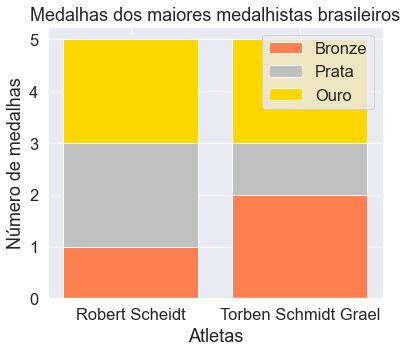

In [10]:
plt.figure(figsize=(6,5))
plt.bar(df_aux.index,df_aux['Bronze'], color='coral')
plt.bar(df_aux.index,df_aux['Silver'], color='silver', bottom=df_aux['Bronze'])
plt.bar(df_aux.index,df_aux['Gold'], color='gold', bottom=df_aux['Bronze']+df_aux['Silver'])
plt.ylabel('Número de medalhas')
plt.xlabel('Atletas')
plt.title('Medalhas dos maiores medalhistas brasileiros')
plt.legend(['Bronze','Prata','Ouro']);


Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [11]:
# Filtrando um DF para organizar as medalhas por evento
df_medalhasBR = df_medalhistasBR[['Year', 'Sport','Event','Medal']].drop_duplicates()

In [12]:
bronze=df_medalhasBR.groupby(['Medal'])['Sport'].value_counts()['Bronze']
silver=df_medalhasBR.groupby(['Medal'])['Sport'].value_counts()['Silver']
gold=df_medalhasBR.groupby(['Medal'])['Sport'].value_counts()['Gold']

In [13]:
df_aux = pd.concat([gold,silver,bronze],axis=1)
df_aux.columns=['Gold','Silver','Bronze']
df_aux.fillna(0,inplace=True)

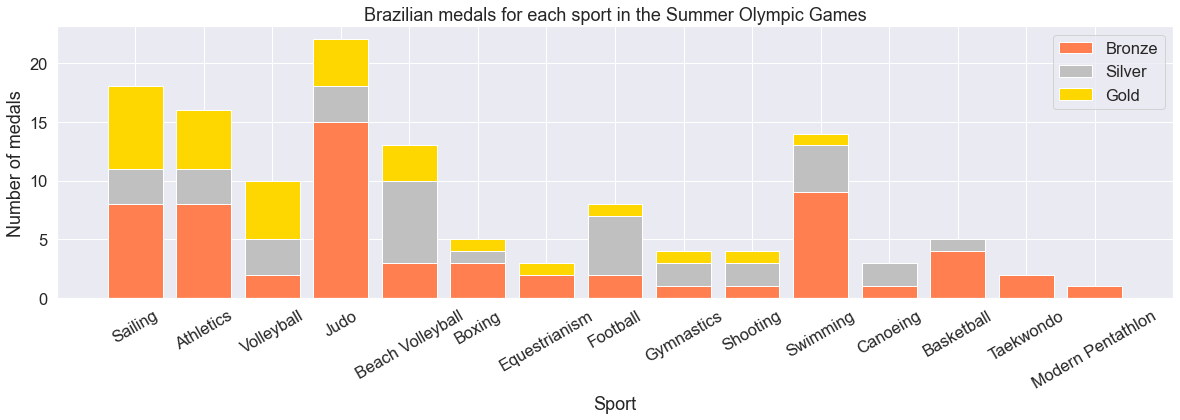

In [14]:
plt.figure(figsize=(20,5))
plt.bar(df_aux.index, df_aux['Bronze'], color='coral')
plt.bar(df_aux.index, df_aux['Silver'], color='silver', bottom=df_aux['Bronze'])
plt.bar(df_aux.index, df_aux['Gold'], color='gold', bottom=df_aux['Bronze']+df_aux['Silver'])
plt.xticks(rotation=30)
plt.title('Brazilian medals for each sport in the Summer Olympic Games')
plt.xlabel('Sport')
plt.ylabel('Number of medals')
plt.legend(['Bronze','Silver','Gold']);

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [15]:
bronze=df_medalhasBR.groupby(['Medal'])['Event'].value_counts()['Bronze']
silver=df_medalhasBR.groupby(['Medal'])['Event'].value_counts()['Silver']
gold=df_medalhasBR.groupby(['Medal'])['Event'].value_counts()['Gold']

In [16]:
df_aux = pd.concat([gold,silver,bronze],axis=1)
df_aux.columns=['Gold','Silver','Bronze']
df_aux.fillna(0,inplace=True)

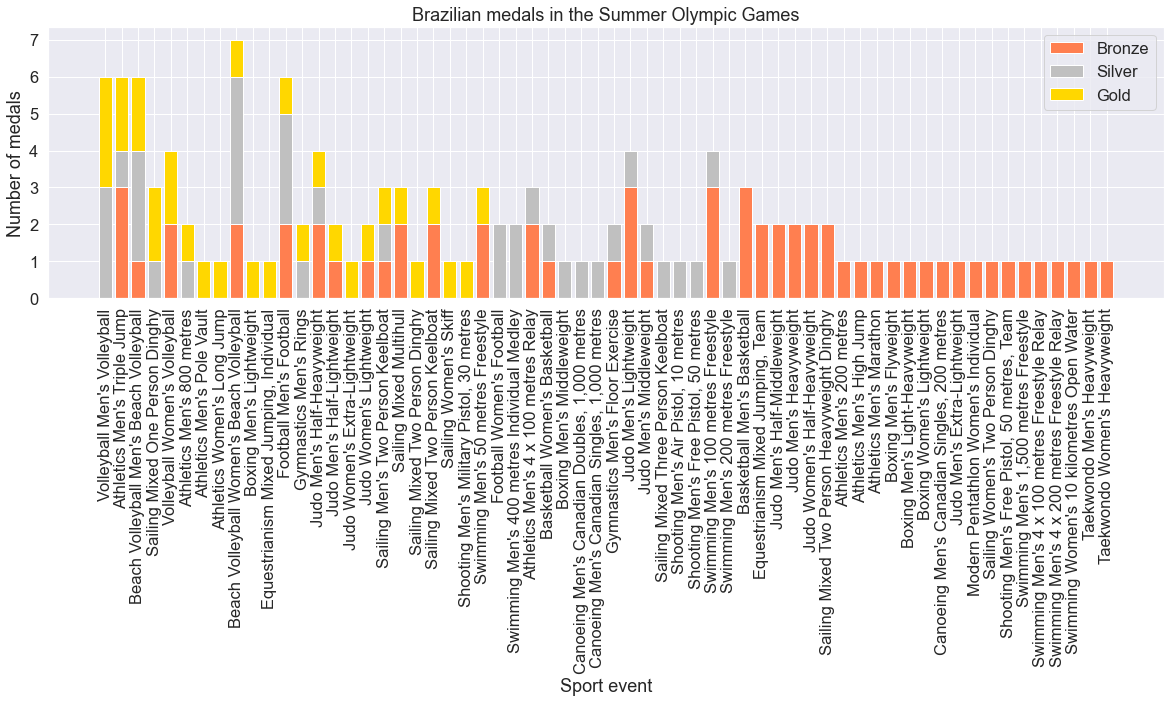

In [17]:
plt.figure(figsize=(20,5))
plt.bar(df_aux.index, df_aux['Bronze'], color='coral')
plt.bar(df_aux.index, df_aux['Silver'], color='silver', bottom=df_aux['Bronze'])
plt.bar(df_aux.index, df_aux['Gold'], color='gold', bottom=df_aux['Bronze']+df_aux['Silver'])
plt.xticks(rotation=90)
plt.title('Brazilian medals in the Summer Olympic Games')
plt.ylabel('Number of medals')
plt.xlabel('Sport event')
plt.legend(['Bronze','Silver','Gold']);

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [18]:
# Recuperando informações do DF df_medalhasBR para organizar informações por esport
bronze=df_medalhasBR.groupby(['Medal'])['Sport'].value_counts()['Bronze']
silver=df_medalhasBR.groupby(['Medal'])['Sport'].value_counts()['Silver']
gold=df_medalhasBR.groupby(['Medal'])['Sport'].value_counts()['Gold']
# Gerando DF auxiliar para organizar os dados
df_aux = pd.concat([gold,silver,bronze],axis=1)
df_aux.columns = ['Gold','Silver','Bronze']
df_aux['Total'] = df_aux.sum(axis=1)

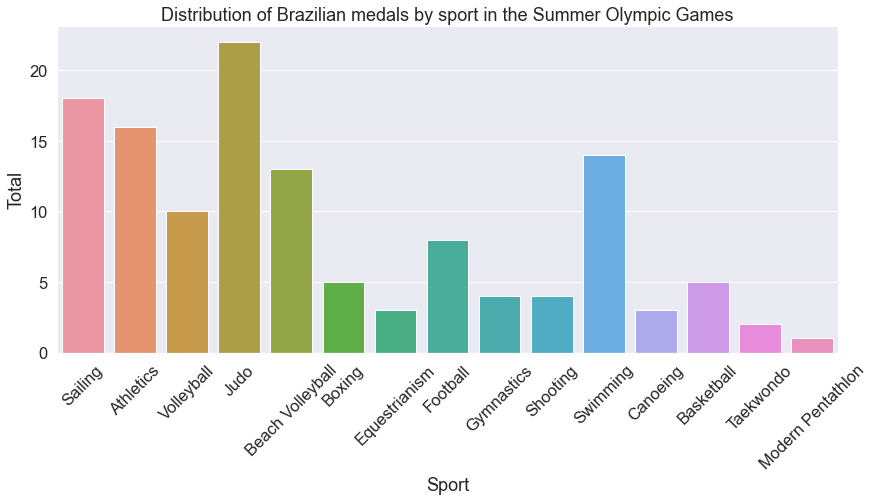

In [19]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(14,6))

sns.barplot(data=df_aux,x=df_aux.index, y='Total')
plt.title('Distribution of Brazilian medals by sport in the Summer Olympic Games')
plt.xticks(rotation=45);

Repita o procedimento acima, mas com medalhas de ouro.

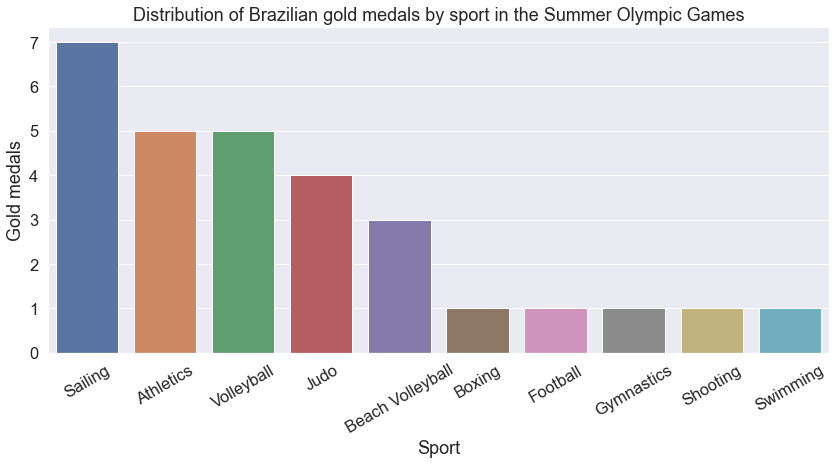

In [20]:
plt.figure(figsize=(14,6))

sns.barplot(data=df_aux.dropna(),x=df_aux.dropna().index, y='Gold')
plt.title('Distribution of Brazilian gold medals by sport in the Summer Olympic Games')
plt.ylabel('Gold medals')
plt.xticks(rotation=30);
#teste.set_xticklabels(teste.get_xticklabels(), rotation=45);

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

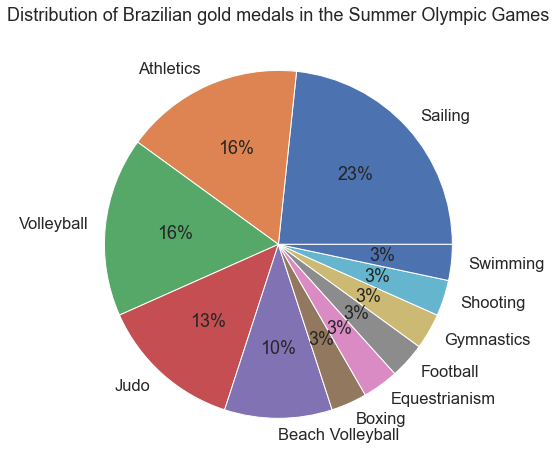

In [21]:
plt.figure(figsize=(8,8))
plt.pie(df_aux['Gold'].dropna(), autopct='%d%%', labels=df_aux['Gold'].dropna().index)
plt.title('Distribution of Brazilian gold medals in the Summer Olympic Games');

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [22]:
df_aux = df_atletas[(df_atletas['NOC']=='BRA') & (df_atletas['Season']=='Summer')].reset_index(drop=True)
df_aux = df_aux[['Year', 'Sport', 'Event','Medal']].drop_duplicates().sort_values(by=['Year']).reset_index(drop=True)
edicoes = df_aux['Year'].unique() # salva ano das edições
edicoes.sort() # ordena os anos

In [23]:
df_brasil_edicoes = pd.DataFrame(index=edicoes)

In [24]:
df_aux.groupby('Year')['Medal'].value_counts()

Year  Medal 
1920  Bronze    1
      Gold      1
      Silver    1
1948  Bronze    1
1952  Bronze    2
      Gold      1
1956  Gold      1
1960  Bronze    2
1964  Bronze    1
1968  Bronze    2
      Silver    1
1972  Bronze    2
1976  Bronze    2
1980  Bronze    2
      Gold      2
1984  Silver    5
      Bronze    2
      Gold      1
1988  Bronze    3
      Silver    2
      Gold      1
1992  Gold      2
      Silver    1
1996  Bronze    9
      Gold      3
      Silver    3
2000  Bronze    6
      Silver    6
2004  Gold      5
      Bronze    3
      Silver    2
2008  Bronze    9
      Silver    4
      Gold      3
2012  Bronze    9
      Silver    5
      Gold      3
2016  Gold      7
      Bronze    6
      Silver    6
Name: Medal, dtype: int64

In [25]:
# DF listando ano, esportes, eventos e medalha, removendo valores duplicados (esportes coletivos)
df_medalhasAnoBR = df_medalhistasBR[['Year', 'Sport', 'Event','Medal']].drop_duplicates().sort_values(by=['Sport']).reset_index(drop=True)

# Selecionando os anos em que o Brasil foi medalhista em um array
anos_medalhistasBR = df_medalhistasBR['Year'].unique()
anos_medalhistasBR.sort() # ordenando os anos
# Criando um DF com os anos como índices
df_medalhas_brasil_ano = pd.DataFrame(index=anos_medalhistasBR)
# Criando colunas com a contagem de cada tipo de medalha por ano
df_medalhas_brasil_ano['Gold'] = df_medalhasAnoBR.groupby('Medal')['Year'].value_counts().loc['Gold']
df_medalhas_brasil_ano['Silver'] = df_medalhasAnoBR.groupby('Medal')['Year'].value_counts().loc['Silver']
df_medalhas_brasil_ano['Bronze'] = df_medalhasAnoBR.groupby('Medal')['Year'].value_counts().loc['Bronze']
df_medalhas_brasil_ano

,Gold,Silver,Bronze
1920,1.0,1.0,1.0
1948,NaN,NaN,1.0
1952,1.0,NaN,2.0
1956,1.0,NaN,NaN
1960,NaN,NaN,2.0
1964,NaN,NaN,1.0
1968,NaN,1.0,2.0
1972,NaN,NaN,2.0
1976,NaN,NaN,2.0
1980,2.0,NaN,2.0


In [26]:
df_campanhasBR = pd.concat([df_brasil_edicoes,df_medalhas_brasil_ano],axis=1)
df_campanhasBR.fillna(0,inplace=True)

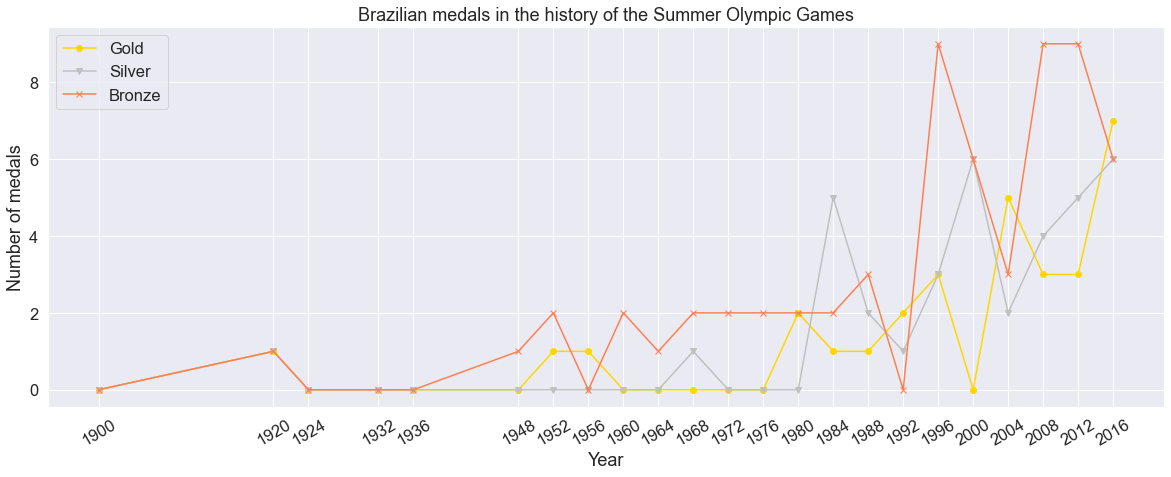

In [27]:
# Fazendo o gráfico
plt.figure(figsize=(20,7))
plt.plot(df_campanhasBR.index,df_campanhasBR['Gold'], color='gold', marker='o')
plt.plot(df_campanhasBR.index,df_campanhasBR['Silver'], color='silver', marker='v')
plt.plot(df_campanhasBR.index,df_campanhasBR['Bronze'], color='coral', marker='x')
plt.xticks(df_campanhasBR.index, rotation=30)
plt.legend(['Gold','Silver','Bronze'])
plt.title('Brazilian medals in the history of the Summer Olympic Games')
plt.ylabel('Number of medals')
plt.xlabel('Year');


## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [28]:
df_medalhistas = df_atletas[(df_atletas['Season']=='Summer') & (~df_atletas['Medal'].isna())].reset_index(drop=True)
df_medalhistas.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze


In [29]:
df_medalhistas['Name'].value_counts().describe()

count    24545.000000
mean         1.388796
std          0.939906
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         28.000000
Name: Name, dtype: float64

Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

#### PS:
Acho que não entendi direito essa tarefa, o boxplot ficou muito esquisito mesmo retirando outliers. Não sei se sera bem essa a ideia...

In [30]:
medalhistas_totais = df_medalhistas['Name'].value_counts()
medalhistas_filtrado = df_medalhistas['Name'].value_counts()[df_medalhistas['Name'].value_counts() < 3]

In [31]:
df_medalhistas['Name'].value_counts()

Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Borys Anfiyanovych Shakhlin           13
Edoardo Mangiarotti                   13
                                      ..
Marc-Antoine Olivier                   1
Simon Niepmann                         1
Gennady Timofeyevich Chetin            1
Tessa Gobbo                            1
Rhiannon "Rhi" Jeffrey                 1
Name: Name, Length: 24545, dtype: int64

Text(0.5, 0, 'Boxplot dados filtrados')

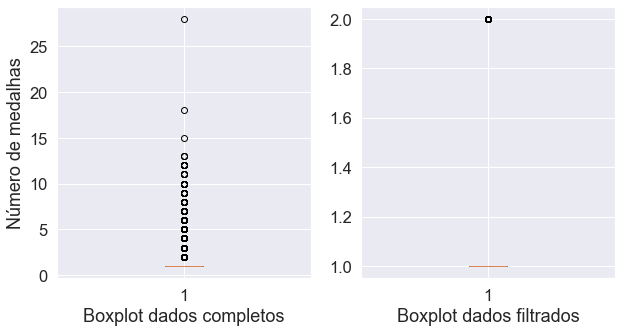

In [32]:
plt.figure(figsize=(10, 5))

plt.subplot(121) # 1 linhas, 1 coluna, 1o gráfico
plt.boxplot(medalhistas_totais)
plt.xlabel('Boxplot dados completos')
plt.ylabel('Número de medalhas')

plt.subplot(122) # 1 linhas, 1 coluna, 2o gráfico
plt.boxplot(medalhistas_filtrado);
plt.xlabel('Boxplot dados filtrados')

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [33]:
df_ourosPaises = df_atletas[df_atletas['Medal']=='Gold'] # DF só com os ouros
df_ourosPaises = df_ourosPaises[['NOC', 'Year', 'Event','Medal']].reset_index(drop=True) # Separando somente NOC,Year,Event
df_ourosPaises.drop_duplicates(inplace=True) # Exclusão de dados repetidos (ocorrências em esportes coletivos)
df_ourosPaises

,NOC,Year,Event,Medal
0,DEN,1900,Tug-Of-War Men's Tug-Of-War,Gold
1,FIN,1948,Gymnastics Men's Team All-Around,Gold
2,FIN,1948,Gymnastics Men's Horse Vault,Gold
3,FIN,1948,Gymnastics Men's Pommelled Horse,Gold
4,NOR,1992,Alpine Skiing Men's Super G,Gold
...,...,...,...,...
13363,GER,1908,Diving Men's Springboard,Gold
13364,SUI,1896,Gymnastics Men's Pommelled Horse,Gold
13366,BLR,2000,Athletics Women's Discus Throw,Gold
13367,GEO,2004,Judo Men's Middleweight,Gold


In [34]:
ouros_paises = df_ourosPaises['NOC'].value_counts(normalize=True)[0:10]

In [35]:
df_ourosPaises['NOC'].value_counts(normalize=True)[10:].sum()

0.42485875706214704

In [36]:
outros = df_ourosPaises['NOC'].value_counts(normalize=True)[10:].sum()
outros = pd.Series(outros,index=['OTHERS'])

In [37]:
ouros_paises = ouros_paises.append(outros)

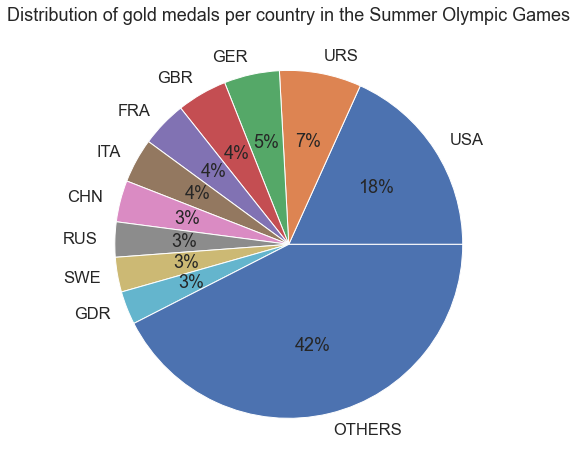

In [38]:
plt.figure(figsize=(8,8))
plt.pie(ouros_paises, autopct='%d%%', labels=ouros_paises.index)
plt.title('Distribution of gold medals per country in the Summer Olympic Games');

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [39]:
# Retomamos o df_medalhistas:
medalhas_totais_paises = df_medalhistas[['NOC', 'Year','Event','Medal']].drop_duplicates()
medalhas_totais_paises['NOC'].value_counts()

USA    2544
URS    1005
GBR     892
GER     776
FRA     770
       ... 
CYP       1
AHO       1
MKD       1
BAR       1
MNE       1
Name: NOC, Length: 147, dtype: int64

In [40]:
medalhas_paises = medalhas_totais_paises['NOC'].value_counts(normalize=True)[0:10]

In [41]:
medalhas_outros = medalhas_totais_paises['NOC'].value_counts(normalize=True)[10:].sum()

In [42]:
medalhas_outros = pd.Series(medalhas_outros,index=['OTHERS'])
medalhas_paises = medalhas_paises.append(medalhas_outros)

In [43]:
medalhas_paises

USA       0.158485
URS       0.062609
GBR       0.055569
GER       0.048343
FRA       0.047969
ITA       0.037877
CHN       0.033765
SWE       0.031959
AUS       0.031523
HUN       0.031398
OTHERS    0.460503
dtype: float64

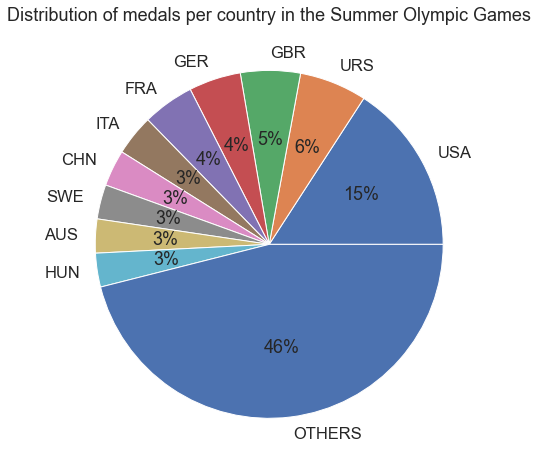

In [44]:
plt.figure(figsize=(8,8))
plt.pie(medalhas_paises, autopct='%d%%', labels=medalhas_paises.index)
plt.title('Distribution of medals per country in the Summer Olympic Games');

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

In [45]:
nomes_top10 = medalhas_paises.index
nomes_top10 = nomes_top10.drop('OTHERS')
#nomes_top10

In [46]:
df_aux1 = df_medalhistas[['NOC', 'Year','Event','Medal']].drop_duplicates().reset_index(drop=True)

In [47]:
df_aux = pd.DataFrame(columns=['Gold','Silver','Bronze'],index=nomes_top10)
for nome in nomes_top10:
    df_aux.loc[nome]['Gold'] = df_aux1.groupby(['Medal'])['NOC'].value_counts()['Gold'][nome]
    df_aux.loc[nome]['Silver'] = df_aux1.groupby(['Medal'])['NOC'].value_counts()['Silver'][nome]
    df_aux.loc[nome]['Bronze'] = df_aux1.groupby(['Medal'])['NOC'].value_counts()['Bronze'][nome]

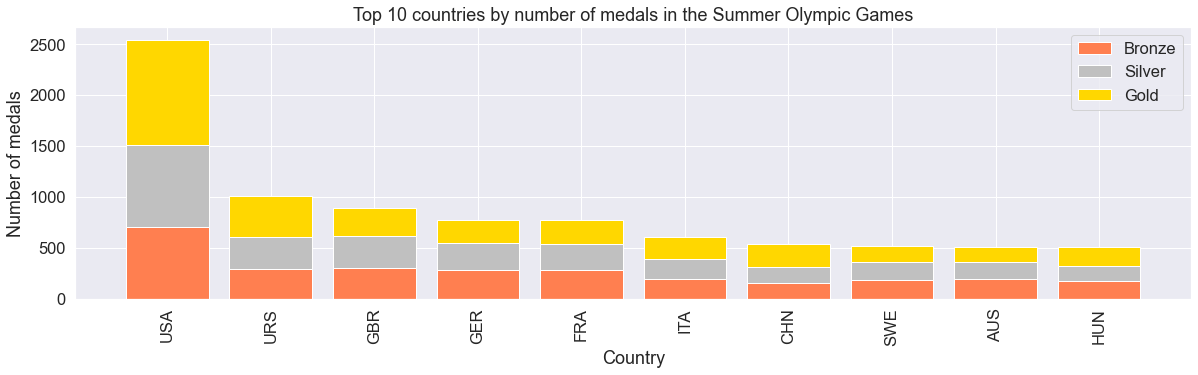

In [48]:
plt.figure(figsize=(20,5))
plt.bar(df_aux.index, df_aux['Bronze'], color='coral')
plt.bar(df_aux.index, df_aux['Silver'], color='silver', bottom=df_aux['Bronze'])
plt.bar(df_aux.index, df_aux['Gold'], color='gold', bottom=df_aux['Bronze']+df_aux['Silver'])
plt.xticks(rotation=90)
plt.title('Top 10 countries by number of medals in the Summer Olympic Games')
plt.ylabel('Number of medals')
plt.xlabel('Country')
plt.legend(['Bronze','Silver','Gold']);

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

In [49]:
df_aux['Total'] = df_aux.sum(axis=1)
df_aux

,Gold,Silver,Bronze,Total
USA,1035,802,707,2544.0
URS,394,317,294,1005.0
GBR,278,316,298,892.0
GER,233,261,282,776.0
FRA,233,255,282,770.0
ITA,219,191,198,608.0
CHN,227,162,153,542.0
SWE,150,175,188,513.0
AUS,147,167,192,506.0
HUN,178,154,172,504.0


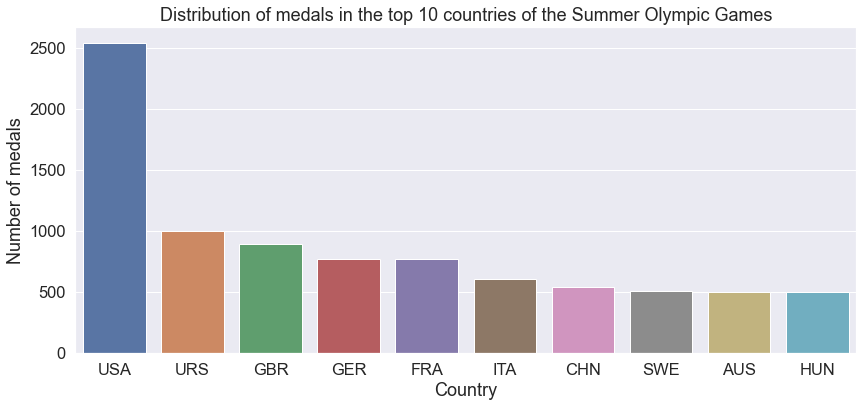

In [50]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(14,6))

fig = sns.barplot(data=df_aux,x=df_aux.index, y='Total')
plt.title('Distribution of medals in the top 10 countries of the Summer Olympic Games')
plt.ylabel('Number of medals')
plt.xlabel('Country');

## 3. Brasil vs Mundo

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.

In [51]:
aux2 = medalhas_totais_paises['NOC'].value_counts()[0:10]

In [52]:
brasil = pd.Series(medalhas_totais_paises['NOC'].value_counts(),index=['BRA'])

In [53]:
aux2 = aux2.append(brasil)

In [54]:
outros = medalhas_totais_paises['NOC'].value_counts()[10:].drop('BRA').sum()

In [55]:
outros = pd.Series(outros,index=['OTHERS'])

In [56]:
aux2 = aux2.append(outros)

In [57]:
aux2

USA       2544
URS       1005
GBR        892
GER        776
FRA        770
ITA        608
CHN        542
SWE        513
AUS        506
HUN        504
BRA        128
OTHERS    7264
dtype: int64

In [58]:
df_aux2 = pd.DataFrame(aux2)

In [59]:
df_aux2.columns=['Medals']

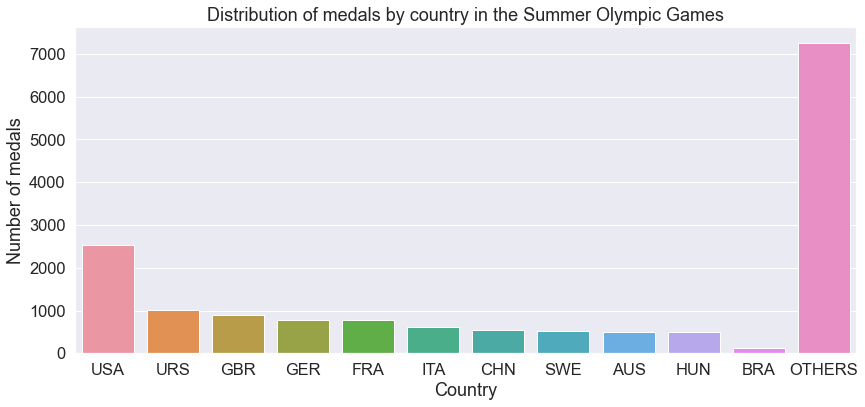

In [60]:
plt.figure(figsize=(14,6))

fig = sns.barplot(data=df_aux2,x=df_aux2.index,y='Medals')
plt.title('Distribution of medals by country in the Summer Olympic Games')
#plt.xticks(aux2.index)
plt.ylabel('Number of medals')
plt.xlabel('Country');

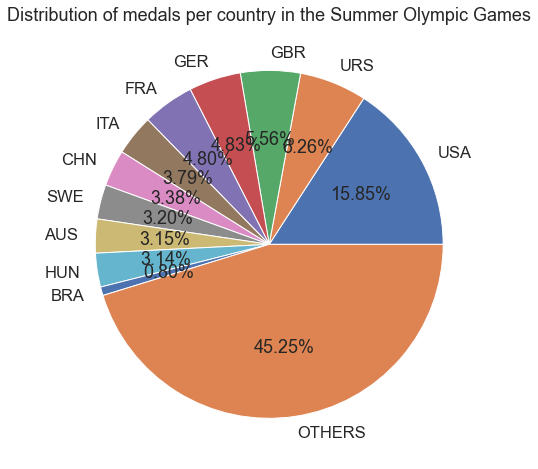

In [61]:
plt.figure(figsize=(8,8))
plt.pie(aux2, autopct='%.2f%%', labels=aux2.index)
plt.title('Distribution of medals per country in the Summer Olympic Games');